<a href="https://colab.research.google.com/github/SubhayanSinha/21BDS0114_ML/blob/main/21BDS0114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submitted by Subhayan Sinha 21BDS0114**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [2]:
# URL of the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)


In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
print("Dataset Dimensions:", df.shape)


Dataset Dimensions: (27820, 12)


In [6]:

print("\nColumn Info:")
df.info()


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:


print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


# **Data Cleaning**

In [9]:
df_cleaned = df.dropna()

In [10]:
# Convert 'gdp_for_year ($)' to numerical format
df_cleaned[' gdp_for_year ($) '] = df_cleaned[' gdp_for_year ($) '].replace(',', '', regex=True).astype(float)

# Convert year to categorical type
df_cleaned['year'] = df_cleaned['year'].astype(str)

<ipython-input-10-8b5fbe7d4baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' gdp_for_year ($) '] = df_cleaned[' gdp_for_year ($) '].replace(',', '', regex=True).astype(float)
<ipython-input-10-8b5fbe7d4baa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['year'].astype(str)


In [11]:
df_cleaned.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,2.424499e+09,835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,2.424499e+09,835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,2.424499e+09,835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,2.424499e+09,835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,2.424499e+09,835,Generation X


In [12]:
df_cleaned.columns = df_cleaned.columns.str.strip()


In [13]:
df_cleaned.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,2.424499e+09,835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,2.424499e+09,835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,2.424499e+09,835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,2.424499e+09,835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,2.424499e+09,835,Generation X


In [14]:
# Check duplicate values
print("\nDuplicate Rows:", df_cleaned.duplicated().sum())

# Display cleaned dataset info
df_cleaned.info()


Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8364 non-null   object 
 1   year                8364 non-null   object 
 2   sex                 8364 non-null   object 
 3   age                 8364 non-null   object 
 4   suicides_no         8364 non-null   int64  
 5   population          8364 non-null   int64  
 6   suicides/100k pop   8364 non-null   float64
 7   country-year        8364 non-null   object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    8364 non-null   float64
 10  gdp_per_capita ($)  8364 non-null   int64  
 11  generation          8364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.1+ MB


# **Univariate Analysis**

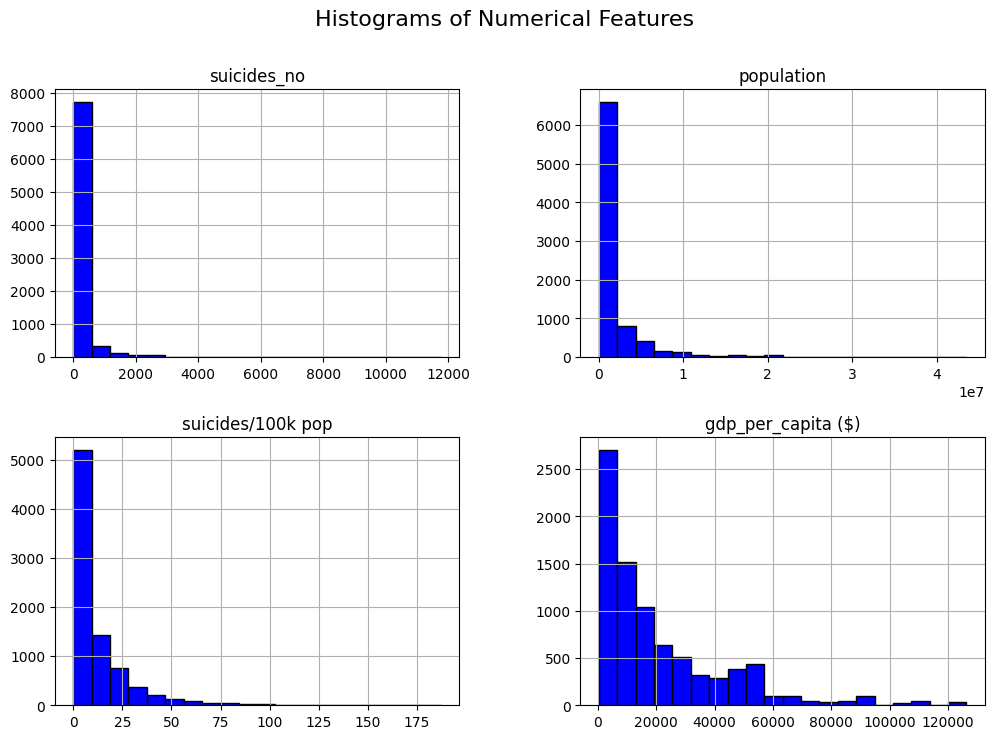

In [15]:
# Histograms
df_cleaned[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].hist(figsize=(12, 8), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()




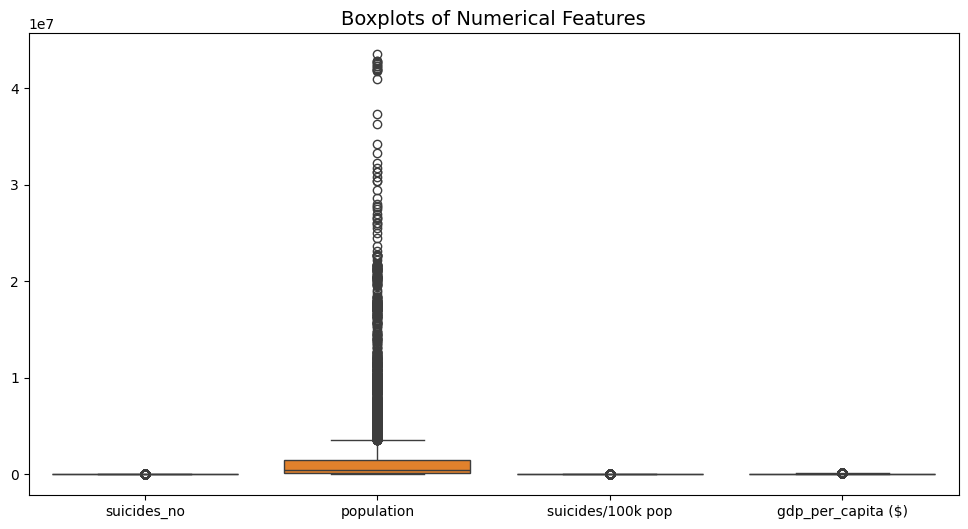

In [16]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']])
plt.title("Boxplots of Numerical Features", fontsize=14)
plt.show()

<ipython-input-17-7ef7e898611a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_cleaned, palette='coolwarm')


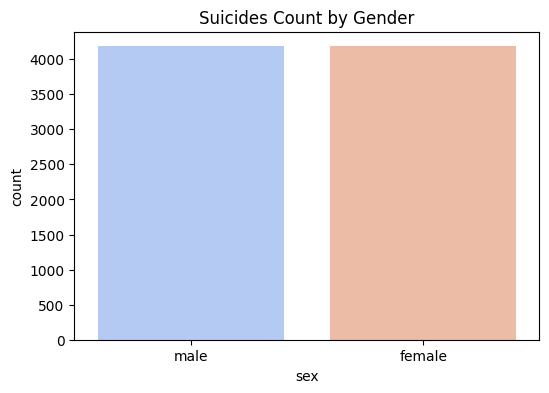

In [17]:
# Countplot for Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df_cleaned, palette='coolwarm')
plt.title("Suicides Count by Gender")
plt.show()


<ipython-input-18-e6731ff9f221>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='generation', data=df_cleaned, order=df_cleaned['generation'].value_counts().index, palette='coolwarm')


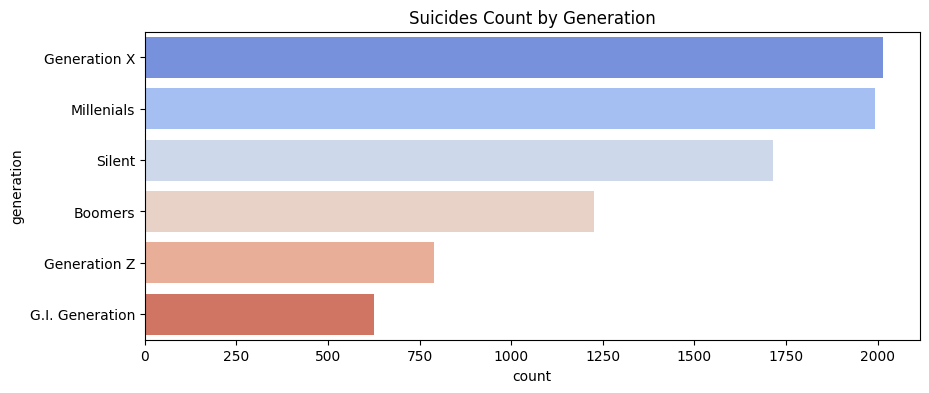

In [18]:

# Countplot for Generation Distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='generation', data=df_cleaned, order=df_cleaned['generation'].value_counts().index, palette='coolwarm')
plt.title("Suicides Count by Generation")
plt.show()


# **Bivariate Analysis**

<ipython-input-19-2d3c8026f7b1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='suicides_no', data=df_cleaned, estimator=sum, ci=None, palette='coolwarm')
<ipython-input-19-2d3c8026f7b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='suicides_no', data=df_cleaned, estimator=sum, ci=None, palette='coolwarm')


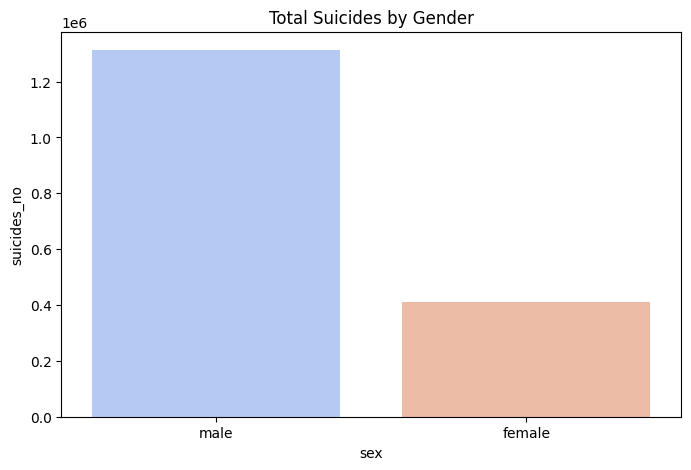

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='suicides_no', data=df_cleaned, estimator=sum, ci=None, palette='coolwarm')
plt.title("Total Suicides by Gender")
plt.show()


<ipython-input-20-cb67332d4127>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='suicides/100k pop', data=df_cleaned, palette='viridis')


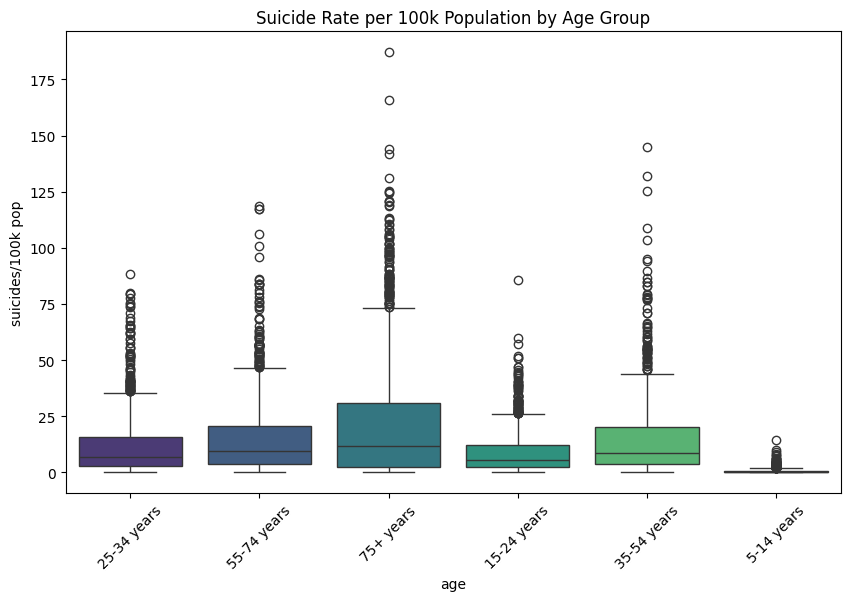

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='suicides/100k pop', data=df_cleaned, palette='viridis')
plt.xticks(rotation=45)
plt.title("Suicide Rate per 100k Population by Age Group")
plt.show()


<ipython-input-21-e026384abb6a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='suicides_no', data=df_cleaned, estimator=sum, ci=None, marker='o', color='red')


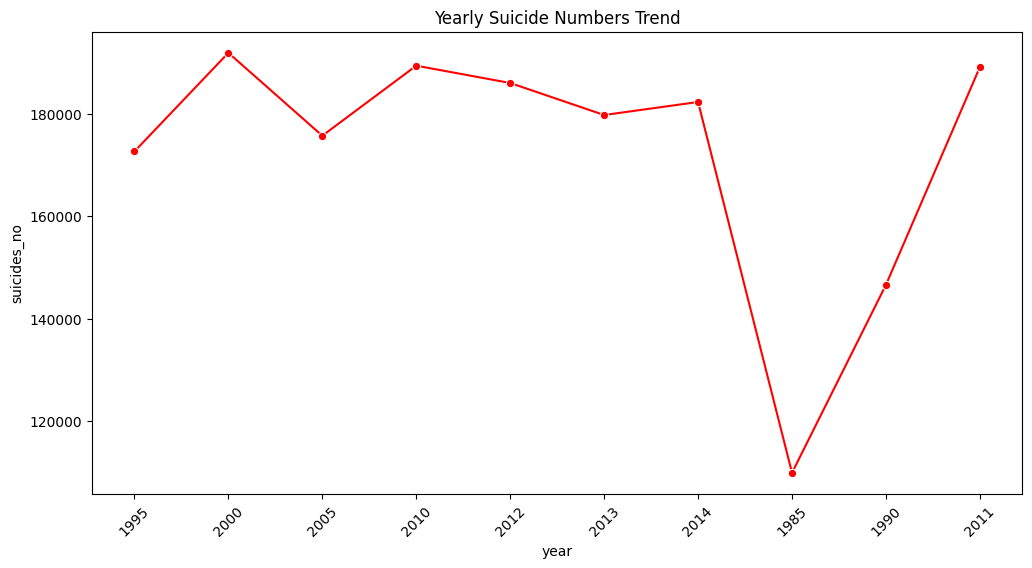

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides_no', data=df_cleaned, estimator=sum, ci=None, marker='o', color='red')
plt.xticks(rotation=45)
plt.title("Yearly Suicide Numbers Trend")
plt.show()

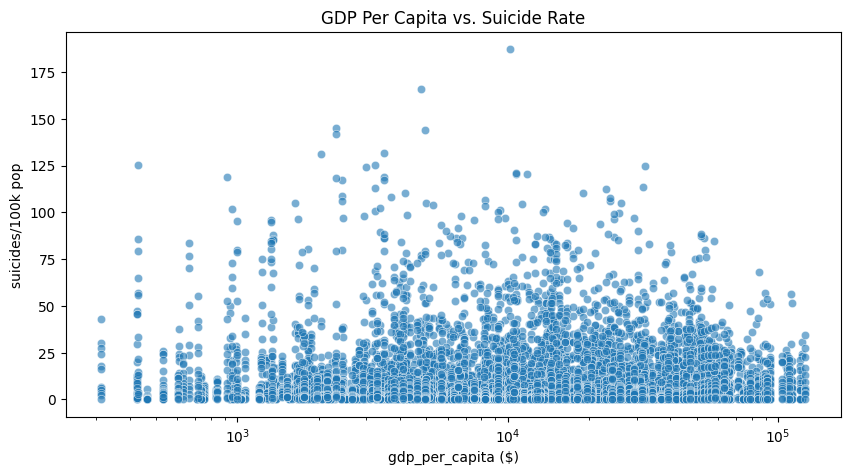

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df_cleaned, alpha=0.6)
plt.title("GDP Per Capita vs. Suicide Rate")
plt.xscale('log')
plt.show()

# **Multivariate Analysis**

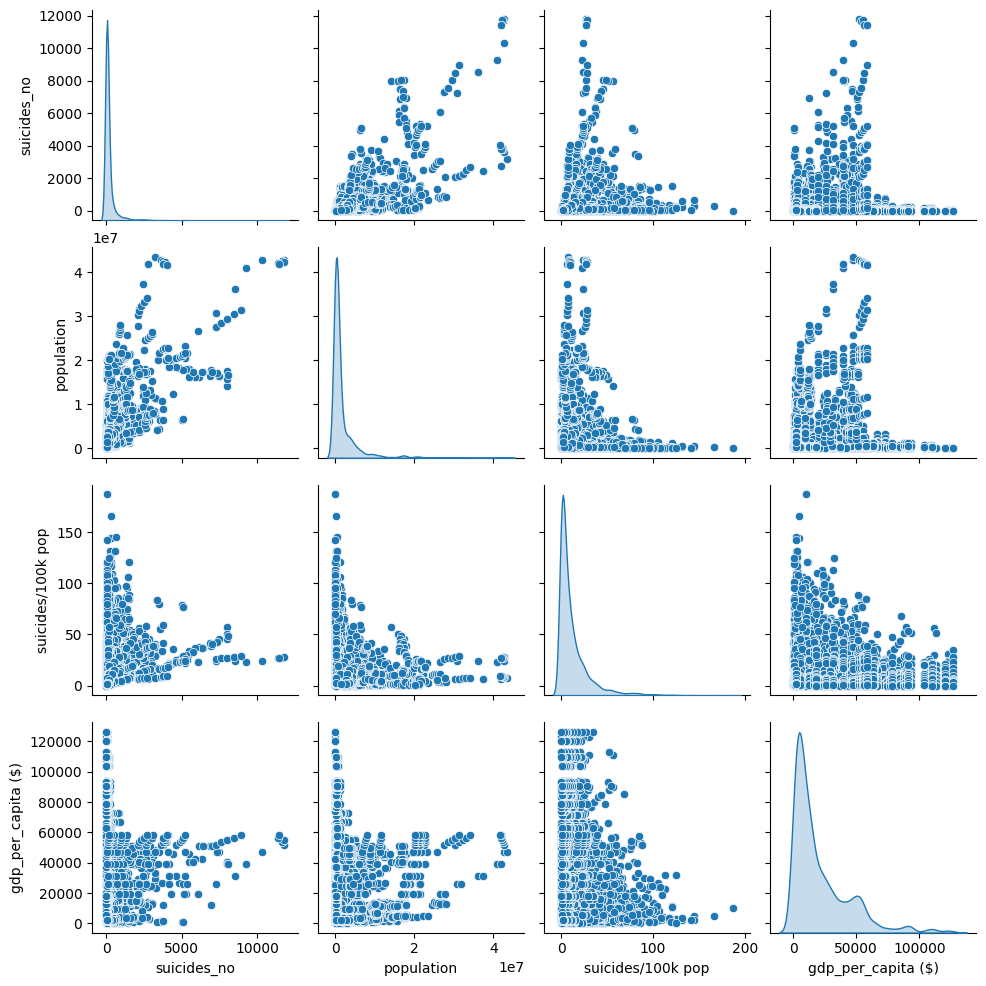

In [23]:
sns.pairplot(df_cleaned[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']], diag_kind='kde')
plt.show()

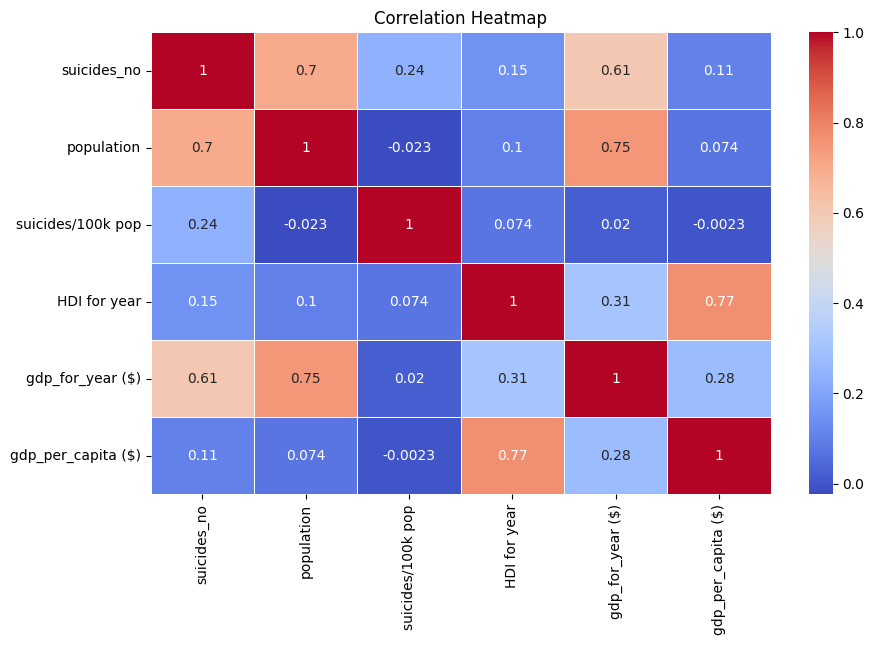

In [24]:
# Select only numerical columns
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


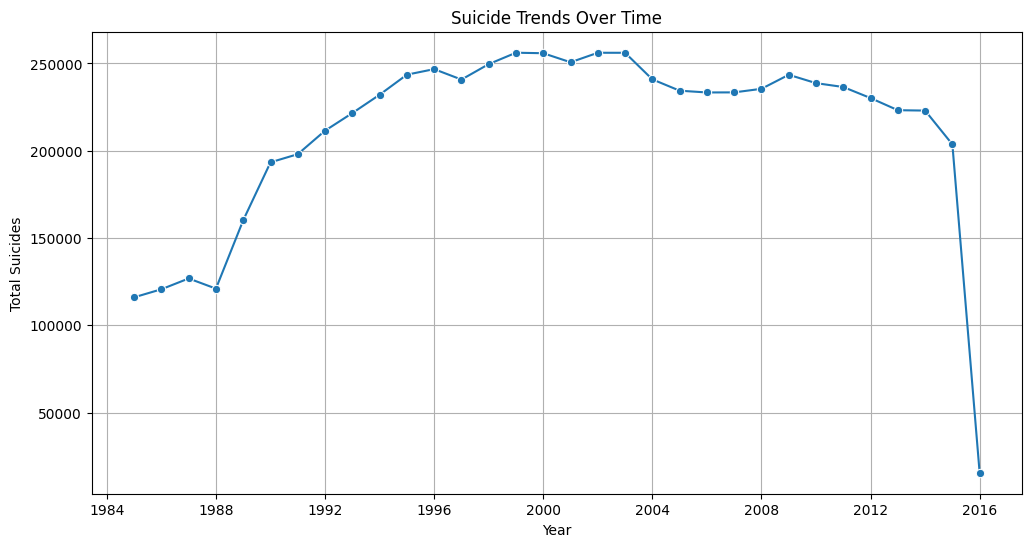

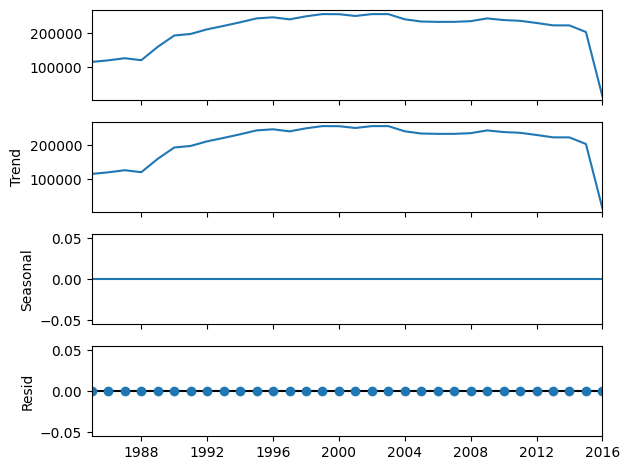

ADF Statistic: 0.18130472889394983
P-Value: 0.9711933230240763
Data is NOT stationary (Consider Differencing)
Forecast for next 5 years: 32    -39667.994582
33    -56113.688341
34    -74720.683286
35    -90466.413772
36   -104330.889127
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv"
df = pd.read_csv(url)

# Convert 'year' to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Aggregate total suicides per year
df_tsa = df.groupby('year')['suicides_no'].sum().reset_index()

# Plot Suicide Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tsa, x='year', y='suicides_no', marker='o')
plt.title("Suicide Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.grid(True)
plt.show()

# Seasonal Decomposition
decomp = seasonal_decompose(df_tsa.set_index('year'), model='additive', period=1)
decomp.plot()
plt.show()

# Dickey-Fuller Test for Stationarity
adf_test = adfuller(df_tsa['suicides_no'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is NOT stationary (Consider Differencing)")

# Fit ARIMA Model (if stationarity confirmed)
model = ARIMA(df_tsa['suicides_no'], order=(2, 1, 2))  # Adjust (p, d, q) based on ACF/PACF
model_fit = model.fit()

# Forecast Future Trends
forecast = model_fit.forecast(steps=5)  # Predict next 5 years
print("Forecast for next 5 years:", forecast)